# Uncertainty Quantification Tutorial

This tutorial covers uncertainty quantification in velocity predictions, including directional and extrinsic uncertainty analysis.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import torch
import lineagevi

In [3]:
adata_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/inputs/anndata/processed/pancreas.h5ad'
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas/vae_velocity_model.pt'

adata = sc.read_h5ad(adata_path)


linvi = lineagevi.utils.load_model(
    adata,
    model_path=model_path,
    map_location='cpu',
    n_hidden=128,
    training=False
)

In [4]:
outs = linvi.get_model_outputs(
        adata,
        n_samples=2,
        return_mean=False,
        return_negative_velo=True,
        base_seed=123,
        save_to_adata=False
    )

for k,v in outs.items():
    print(f'{k}:  {v.shape}')

recon:  (2, 3696, 1995)
z:  (2, 3696, 689)
mean:  (3696, 689)
logvar:  (3696, 689)
velocity_u:  (2, 3696, 1995)
velocity:  (2, 3696, 1995)
velocity_gp:  (2, 3696, 689)
alpha:  (2, 3696, 1995)
beta:  (2, 3696, 1995)
gamma:  (2, 3696, 1995)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.2min


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.4min finished


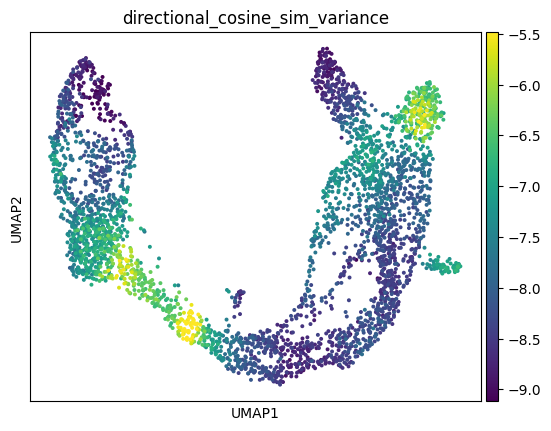

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA              0.000009                0.009233   
 AAACCTGAGCCTTGAT              0.000071                0.027555   
 AAACCTGAGGCAATTA              0.000022                0.014921   
 AAACCTGCATCATCCC              0.000024                0.015064   
 AAACCTGGTAAGTGGC              0.000007                0.008327   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA              0.000007                0.008336   
 TTTGTCAAGTGTGGCA              0.000008                0.009343   
 TTTGTCAGTTGTTTGG              0.000024                0.017005   
 TTTGTCATCGAATGCT              0.000089                0.031039   
 TTTGTCATCTGTTTGT              0.000026                0.014992   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [8]:
linvi.get_directional_uncertainty(
    adata,
    use_gp_velo = False,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:   34.6s


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:   41.8s finished


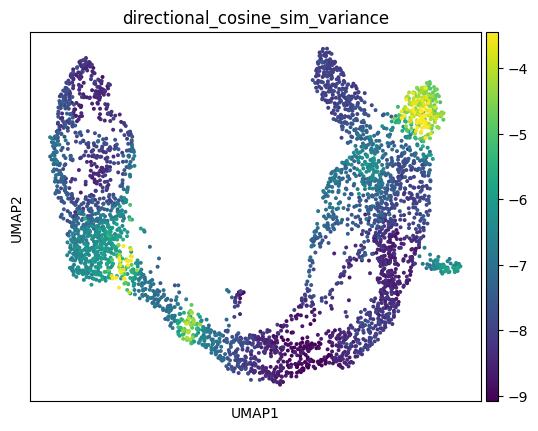

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA              0.000006                0.007180   
 AAACCTGAGCCTTGAT              0.000142                0.036111   
 AAACCTGAGGCAATTA              0.000033                0.018285   
 AAACCTGCATCATCCC              0.000047                0.020218   
 AAACCTGGTAAGTGGC              0.000010                0.009152   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA              0.000014                0.011066   
 TTTGTCAAGTGTGGCA              0.000016                0.011202   
 TTTGTCAGTTGTTTGG              0.000142                0.036613   
 TTTGTCATCGAATGCT              0.001981                0.149370   
 TTTGTCATCTGTTTGT              0.000105                0.027164   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [10]:
linvi.get_directional_uncertainty(
    adata,
    use_gp_velo = True,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.2min finished


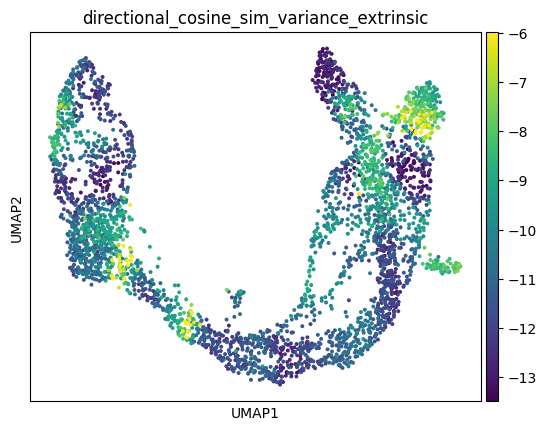

In [9]:
df = linvi.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=False,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.2min finished


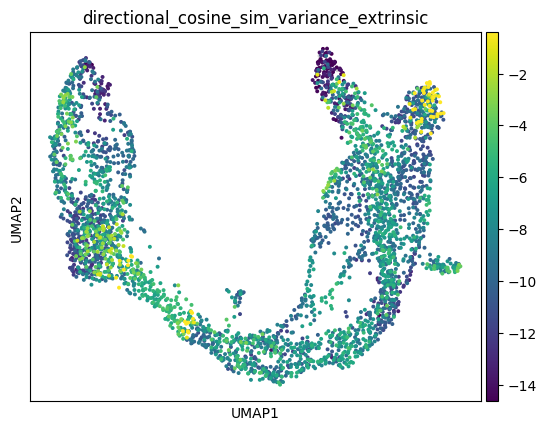

In [13]:
df = linvi.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=True,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)